# Bài tập bổ trợ
## MaSSP 2018, Computer Science

Trong file này, các bạn sẽ vận dụng những hàm đã học trong những notebook trước vào những dữ liệu thực tế. Đáp án của những bài tập này có thể được tìm thấy ở cuối notebook, nhưng các bạn chỉ nên tham khảo sau khi đã giải và kiểm tra cẩn thận kết quả của mình. Mọi thắc mắc hay phát hiện lỗi sai, hãy post lên Facebook group: [MaSSP Tin](https://www.facebook.com/groups/183191748970952/).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Python
Sau đây là một số bài tập giúp các bạn làm quen hơn với ngôn ngữ lập trình Python về mặt cú pháp và cơ sở dữ liệu. Nếu các bạn đã sử dụng ngôn ngữ này thành thạo có thể bỏ qua phần này.

### 1.1 Sử dụng list
Cho một `list` sau:

In [2]:
percents = [20.7, 19.4, 14.7, 7.6, 6.9]

Như các bạn đã biết, các hàm `min, max` có thể được áp dụng lên `list` để tìm ra giá trị nhỏ nhất và lớn nhất của `list`.

In [3]:
print(min(percents))

6.9


1.1.1. Bằng cách sử dụng vòng lặp `for`, hãy viết các hàm `find_min, find_max` để tìm ra giá trị nhỏ nhất và lớn nhất của một `list`. Sau khi hoàn thiện, các bạn hãy dùng các hàm `min, max` để kiểm tra kết quả của mình.

In [10]:
def find_min(array):
    Min = array[0]
    for item in array:
        if Min>item:
            Min = item
    return Min

def find_max(array):
    Max = array[0]
    for item in array:
        if Max<item:
            Max = item
    return Max


# kiểm tra kết quả
print (min(percents) == find_min(percents))
print (max(percents) == find_max(percents))

True
True


1.1.2. Tương tự, hãy dùng vòng lặp `for` để hoàn thiện hàm `find_mean` dùng để tính giá trị trung bình của một `list` các số.

In [12]:
def find_mean(array):
    Sum = 0.0;
    for item in array:
        Sum+=item
    return Sum/len(array)

# kiểm tra kết quả
find_mean(percents) == 13.86

True

Mảng `percents` chúng ta định nghĩa ở trên thực ra là phần trăm thị phần của các công ty sản xuất máy tính lớn trên thế giới vào năm 2016 (nguồn [Wikipedia](https://en.wikipedia.org/wiki/Market_share_of_personal_computer_vendors#Top_vendors_market_share_(2017)). Tên của các công ty được lưu lại trong mảng `companies`:

In [50]:
percents = [20.7, 19.4, 14.7, 7.6, 6.9]
companies = ['Lenovo', 'HP', 'Dell', 'Asus', 'Apple']

1.1.3. Như các bạn để ý trong bảng số liệu trên trang Wikipedia, 5 hãng máy tính này có thị phần cao nhất, và những công ty khác chỉ chiếm 30.7% thị phần. Hãy thêm vào `percents` và `companies` lần lượt các số `30.7` và xâu 'Others'.

In [16]:
# code
percents.append(30.7)
companies.append("Other")
print(percents)
print(companies)

[20.7, 19.4, 14.7, 7.6, 6.9, 30.7, 30.7]
['Lenovo', 'HP', 'Dell', 'Asus', 'Apple', 'Other', 'Other']


### 1.2 Sử dụng dict
Vị trí của tên mỗi công ty trong `companies` tương ứng với vị trí của thị phần của công ty đó trong `percents`, ví dụ 'Apple' chiếm 6.9% thị phần.

1.2.1. Hãy khởi tạo một `dict` có tên `company_to_percent`, trong đó mỗi key là tên của một công ty hoặc 'Others', và value của mỗi key ứng với thị phần của công ty đó.

In [24]:
# code
company_to_percent = {key:value for (key,value) in zip(companies,percents)}
print(company_to_percent)

{'Lenovo': 20.7, 'HP': 19.4, 'Dell': 14.7, 'Asus': 7.6, 'Apple': 6.9, 'Other': 30.7}


1.2.2. Sử dụng biến `company_to_percent` ta vừa định nghĩa ở trên, hãy cho biết thị phần của công ty 'Dell'?

In [25]:
# code
company_to_percent["Dell"]


14.7

1.2.3. Giả sử có sai sót trong việc thu thập dữ liệu, công ty 'Lenovo' chiếm đến 21.5% thị phần thay vì 20.7%, và công ty 'Dell' chiếm 14.5% thay vì 14.7%. Bạn hãy cập nhật lại những thông tin này trong `company_to_percent`, và nhớ là thị phần của tất cả các công ty phải bằng 100%!

In [37]:
# code
company_to_percent["Lenovo"] = 21.5
company_to_percent["Dell"] = 14.5
company_to_percent["Other"] = 100 - sum(company_to_percent.values()) + \
company_to_percent["Other"]
company_to_percent


{'Lenovo': 21.5,
 'HP': 19.4,
 'Dell': 14.5,
 'Asus': 7.6,
 'Apple': 6.9,
 'Other': 30.09999999999999}

## 2. Numpy và matplotlib
Qua bài tập này, chúng ta sẽ thấy rõ lợi ích của việc sử dụng các thư viện có sẵn khi làm việc với nhiều dữ liệu. Thay vì phải viết vòng lặp, có rất nhiều hàm có sẵn trong những thư viện này giúp ta thực hiện nhanh chóng những thao tác thường gặp và dành thời gian giải quyết những vấn đề phức tạp hơn.

### 2.1 Numpy
Sau đây là 2 `list` chứa thị phần của 5 công ty trên trong năm 2016 và 2017:

In [38]:
percents_2016 = [20.7, 19.4, 14.7, 7.6, 6.9]
percents_2017 = [20.8, 21.0, 15.2, 6.8, 7.4]

2.1.1. Hãy khởi tạo 2 vectors `percents_2016_array, percents_2017_array` từ 2 `list` trên.

In [39]:
percents_2016_array = np.array(percents_2016)
percents_2017_array = np.array(percents_2017)

2.1.2. Công ty nào bị giảm thị phần vào năm 2017? Gợi ý: dùng hàm [numpy.where](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html).

In [85]:
np.where(percents_2016_array > percents_2017_array)[0][0]

3

2.1.3. Gộp 2 vectors trên thành một array duy nhất, với hàng đầu tiên chứa thị phần năm 2016, và hàng thứ 2 chứa thị phần năm 2017.

In [60]:
percents_array = np.array([percents_2016_array,percents_2017_array])
percents_array

array([[20.7, 19.4, 14.7,  7.6,  6.9],
       [20.8, 21. , 15.2,  6.8,  7.4]])

2.1.4. Sử dụng hàm `numpy.mean()`, hãy trả lại các array chứa a) giá trị thị phần trung bình của cả 5 công ty trong từng năm 2016 và 2017, và b) giá trị thị phần trung bình của mỗi công ty trong 2 năm.

In [65]:
# code
percents_array.mean(0)

array([20.75, 20.2 , 14.95,  7.2 ,  7.15])

### 2.2 Matplotlib
Bạn hãy vẽ một đồ thị tuỳ ý dựa trên số liệu trên Wikipedia, ví dụ thị phần của công ty Apple và Lenovo qua từng năm, và hãy nhớ đồ thị cần có tên và chú thích!

## 3. Pandas
Khi làm bài tập, các bạn nên tham khảo các hàm thông dụng trong `cheatsheet.ipynb` và tra cứu thư viện pandas hoặc Stackoverflow khi có bug.

Bộ dữ liệu sử dụng trong phần này được tải về từ trang https://dasl.datadescription.com/story/climate-change-2016/ và được chuyển hoá sang dạng `csv` (xem `climate-change-2016.csv`). Bạn hãy mở xem nội dung của tệp tin `climate-change-2016.csv` để hiểu ý nghĩa của từng cột dữ liệu.

Trích dẫn từ trang web:
> Scientists claim that changes in the mean global temperature are primarily due to changes in CO2 levels. Both trends are here from 1959 to 2016. For an alternative, the data includes the annual closing price of the Dow Jones Industrial Average. Can it predict global temperature?

Tạm dịch là:
> Các nhà khoa học cho rằng những thay đổi trong nhiệt độ trung bình toàn cầu có nguyên nhân chủ yếu do thay đổi của nồng độ CO2. Xu hướng biến đổi của cả hai thông số này từ năm 1959 đến năm 2016 được ghi lại tại đây. Dữ liệu bao gồm giá cuối năm của [Chỉ số trung bình công nghiệp Dow Jones](https://vi.wikipedia.org/wiki/Ch%E1%BB%89_s%E1%BB%91_trung_b%C3%ACnh_c%C3%B4ng_nghi%E1%BB%87p_Dow_Jones) như một cách giải thích thay thế khác. Liệu thông tin này có thể dự đoán được nhiệt độ trung bình toàn cầu?

Câu hỏi ngoài lề: không nhìn vào số liệu, theo em chỉ số trung bình công nghiệp Dow Jones sẽ có mối liên hệ thế nào tới nồng độ CO2?

### 3.1 Đọc dữ liệu
3.1.1. Các bạn hãy load dữ liệu trong tệp tin `climate-change-2016.csv` vào biến `df`. Hãy nhớ tra cứu cheatsheet hoặc các bài giảng trước trước khi tham khảo gợi ý ở cuối notebook này!

In [77]:
# code
df = pd.read_csv("climate-change-2016.csv")

3.1.2. Hãy in ra 10 hàng đầu tiên và 10 hàng cuối cùng của bảng dữ liệu này. Nhìn qua các con số, bạn có nhận xét gì về xu hướng của các thông số này? (tăng hay giảm, biên độ tăng giảm lớn hay nhỏ...)

In [78]:
# code
print(df.head(10))
print(df.tail(5))

   year  Global_temp_anomaly  CO2(ppm)    DJIA
0  1959               0.0596    315.97  679.36
1  1960               0.0204    316.91  615.89
2  1961               0.0775    317.64  731.14
3  1962               0.0888    318.45  652.10
4  1963               0.1068    318.99  762.95
5  1964              -0.1495    319.62  874.13
6  1965              -0.0780    320.04  969.26
7  1966              -0.0227    321.38  785.69
8  1967              -0.0131    322.16  905.11
9  1968              -0.0296    323.04  943.75
    year  Global_temp_anomaly  CO2(ppm)      DJIA
53  2012               0.6240    393.85  13104.10
54  2013               0.6679    396.52  16576.66
55  2014               0.7408    398.65  17823.07
56  2015               0.8998    400.83  17425.03
57  2016               0.9363    404.21  19762.60


3.1.3. Trong bảng dữ liệu này có năm nào không có hoặc thiếu dữ liệu không?

In [79]:
# code
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
year                   58 non-null int64
Global_temp_anomaly    58 non-null float64
CO2(ppm)               58 non-null float64
DJIA                   58 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1.9 KB


### 3.2 Minh hoạ dữ liệu trong Pandas
3.2.1 Trong bài giảng về pandas, chúng ta đã học cách vẽ đồ thị từ DataFrame, trong đó mỗi cột dữ liệu được biểu diễn bằng một đường. Hãy sử dụng phương pháp đó để vẽ đồ thị biến thiên của các cột theo thời gian.

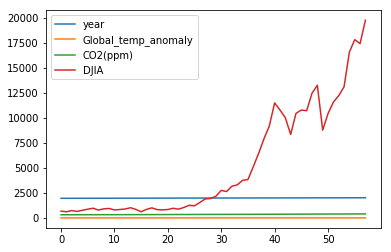

In [81]:
# code
df.plot()

Bạn có nhận xét gì khi vẽ các chỉ số này trên cùng một đồ thị? Chú ý đến độ lớn và đơn vị của từng chỉ số.

Có thể thấy rằng biên độ của nhiệt độ là không lớn, chỉ khoảng 1 độ, trong khi biên độ của chỉ số CO2 theo phần triệu là khoảng 100, và biên độ của chỉ số DJIA còn tới hàng chục nghìn. Khi thể hiện những chỉ số này trên cùng một đồ thị, ta rất dễ ngộ nhận rằng chúng không có mối liên hệ nào vì biên độ nhiệt độ trông giống như được giữ nguyên. Các bạn hãy đón xem các bài giảng tiếp theo để học các phương pháp xác định mối liên hệ giữa các thông số này nhé!

Một lần nữa, tất cả thắc mắc, phát hiện lỗi sai, xin chia sẻ lên [Facebook group nhóm Tin học](https://www.facebook.com/groups/183191748970952/).

### 3.3 Bài tập nâng cao


Nếu có thời gian và không muốn đợi đến chương trình MaSSP, các bạn hãy tìm hiểu thêm các hàm hữu ích khác và cũng phức tạp hơn trong pandas như `groupby`, `size`, `agg` để thực hiện được nhiều thao tác hơn, ví dụ để trả lời một số câu hỏi liên quan đến thống kê trong [bộ quiz về các thế vận hội Olympics](https://www.theguardian.com/sport/2016/aug/05/rio-2016-big-olympics-quiz-games). Dữ liệu cần thiết đã có sẵn trong `medalists_1896_to_2008.csv`, chứa thông tin các thành phố đăng cai, năm diễn ra Olympics, tên các vận động viên, các môn thể thao, và loại huy chương từ năm 1896 đến 2008. Bạn có thể dùng các công cụ đã học để trả lời bộ quiz này không?

# Gợi ý
Đây chỉ là gợi ý cách làm, có thể có những cách ngắn gọn hơn. Nếu bạn tìm thấy lỗi sai hoặc có cách làm ngắn gọn hơn, hãy chia sẻ lên Facebook group!

### 1. Python

In [50]:
# 1.1.1
def find_min(array):
    min_value = None
    for elt in array:
        if not min_value or elt < min_value:
            min_value = elt
    return min_value

def find_max(array):
    max_value = None
    for elt in array:
        if not max_value or elt > max_value:
            max_value = elt
    return max_value

In [54]:
# 1.1.2
# sử dụng hàm sum
def find_mean(array):
    if len(array) == 0:
        return None
    return sum(array) / len(array)

# không sử dụng hàm sum
def find_mean(array):
    if len(array) == 0:
        return None
    sum_value = 0
    for elt in array:
        sum_value += elt
    return elt / len(array)

In [55]:
# 1.1.3
percents = [20.7, 19.4, 14.7, 7.6, 6.9]
companies = ['Lenovo', 'HP', 'Dell', 'Asus', 'Apple']
percents.append(30.7)
companies.append('Others')

In [57]:
# 1.2.1
company_to_percent = { companies[i]:percents[i] for i in range(len(percents)) }
company_to_percent

{'Apple': 6.9,
 'Asus': 7.6,
 'Dell': 14.7,
 'HP': 19.4,
 'Lenovo': 20.7,
 'Others': 30.7}

In [58]:
# 1.2.2
company_to_percent['Dell']

14.7

In [61]:
# 1.2.3
company_to_percent['Dell'] = 14.5
company_to_percent['Lenovo'] = 21.5
sum_without_others = 0
for company in company_to_percent:
    if company != 'Others':
        sum_without_others += company_to_percent[company]
company_to_percent['Others'] = 100 - sum_without_others
company_to_percent

{'Apple': 6.9,
 'Asus': 7.6,
 'Dell': 14.5,
 'HP': 19.4,
 'Lenovo': 21.5,
 'Others': 30.099999999999994}

## 2. Numpy và matplotlib

In [62]:
# 2.1.1
percents_2016_array = np.array(percents_2016)
percents_2017_array = np.array(percents_2017)

In [64]:
# 2.1.2
diff_percents_array = percents_2017_array - percents_2016_array
print(diff_percents_array)
np.where(diff_percents_array < 0)[0][0]

[ 0.1  1.6  0.5 -0.8  0.5]


3

In [65]:
# 2.1.3
percents_array = np.array([percents_2016_array, percents_2017_array])
percents_array

array([[ 20.7,  19.4,  14.7,   7.6,   6.9],
       [ 20.8,  21. ,  15.2,   6.8,   7.4]])

In [67]:
# 2.1.4
print(np.mean(percents_array, axis=0))
print(np.mean(percents_array, axis=1))

[ 20.75  20.2   14.95   7.2    7.15]
[ 13.86  14.24]


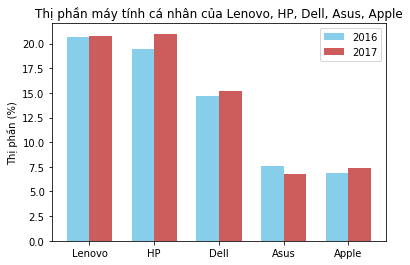

In [89]:
# 2.2
# Phỏng theo https://matplotlib.org/gallery/api/barchart.html 
companies = ['Lenovo', 'HP', 'Dell', 'Asus', 'Apple']
percents_array = np.array([percents_2016_array, percents_2017_array])

ind = np.arange(len(companies))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(ind - width/2, percents_array[0], width, color='SkyBlue', label='2016')
ax.bar(ind + width/2, percents_array[1], width,color='IndianRed', label='2017')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Thị phần (%)')
ax.set_title('Thị phần máy tính cá nhân của Lenovo, HP, Dell, Asus, Apple')
ax.set_xticks(ind)
ax.set_xticklabels(companies)
ax.legend()
plt.show()

## 3. Pandas


In [15]:
# 3.1.1
df = pd.read_csv('climate-change-2016.csv')

In [ ]:
# 3.1.2
df.head(10)
df.tail(10)

In [24]:
# 3.1.3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
year                   58 non-null int64
Global_temp_anomaly    58 non-null float64
CO2(ppm)               58 non-null float64
DJIA                   58 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1.9 KB


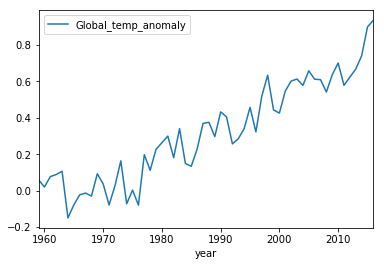

In [18]:
# 3.2.1
df.plot(x='year', y='Global_temp_anomaly')
plt.show()

In [92]:
df5 = df[::5]
df5

,year,Global_temp_anomaly,CO2(ppm),DJIA
0,1959,0.0596,315.97,679.36
5,1964,-0.1495,319.62,874.13
10,1969,0.0929,324.62,800.36
15,1974,-0.0719,330.18,616.24
20,1979,0.2273,336.84,838.74
25,1984,0.1490,344.65,1211.57
30,1989,0.2970,353.12,2753.20
35,1994,0.3409,358.83,3833.40
40,1999,0.4438,368.38,11497.10
45,2004,0.5783,377.52,10783.00


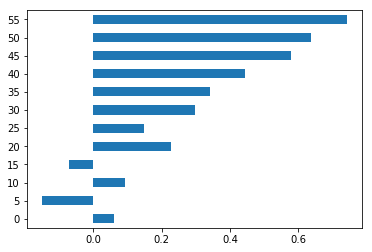

In [93]:
df5.Global_temp_anomaly.plot(kind='barh')
plt.show()